In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
def plot_loss(loss, style):
    plt.figure(figsize=(10,5))
    plt.xlabel('epochs')
    plt.ylabel("Loss")
    plt.plot(loss, style)
    plt.grid()
    
def plot_theta_loss(mtheta_0, xlbl, loss, style):
    plt.figure(figsize=(10,5))
    plt.xlabel(xlbl)
    plt.ylabel("Loss")
    plt.plot(mtheta_0, loss, marker = "o")
    plt.grid()

In [8]:
def MiniGrad(X_1, y_1, alpha, eps, beta1, beta2, epoc, batch_size = 32):
    
    j = []
    x0 = np.ones((len(X_1),1))
    X2 = np.concatenate((x0,X_1), axis = 1)
    cost = []
    h_x = []
    e_cost = []
    
    #dividing into batches
    xx = [X2[batch_size*k:batch_size*(k+1)] for k in range(len(X2)//batch_size + 1)]
    yy = [y_1[batch_size*k:batch_size*(k+1)] for k in range(len(y_1)//batch_size + 1)]
    
    if len(xx[-1]) == 0:
        del(xx[-1])
        del(yy[-1])
  
    #step1
    theta = np.zeros((X2.shape[1],1))
    all_thetas = np.zeros((X2.shape[1],1))
    v = np.zeros((X2.shape[1],1))
    m = np.zeros((X2.shape[1],1))

    for p in range(0, epoc):
        for i, x in enumerate(xx):
            print(f"****************** Iteration {i} ********************")

            #step2
            y_pred = (x @ theta)
            print(f"h(x): {y_pred}")
            print("\n")

            #step3
            e = y_pred - yy[i].reshape(batch_size, 1)
            cost.append((1/(2*batch_size))* (np.linalg.norm(e)**2))
            
            #step4
            d_theta = ((1/batch_size) * sum(x * e)).reshape(len(theta),1)
            print("Gradient Vector: \n", d_theta)
            print("\n")
            d_theta_norm = np.linalg.norm(d_theta)
            print("Gradient Vector Norm: \n", d_theta_norm)
            
            for i in y_pred:
                h_x.extend(i)  
                
            m = beta1 * m + (1-beta1) * d_theta
            v = beta2 * v + (1-beta2) * ((d_theta)**2)
            
            m_hat = (m)/(1-(beta1)**(p+1))
            v_hat = (v)/(1-(beta2)**(p+1))
        
            theta = theta - m_hat * (alpha/(np.sqrt(v_hat)+ eps))
            print("theta_new : ", theta)
            print("\n") 
            
            all_thetas = np.concatenate((all_thetas, theta), axis = 1)
            
        e_cost.append(cost[-1])
        d_the_norm = np.linalg.norm(d_theta)
        
        if (i>0) and ((d_the_norm < 0.01) or (p > 0 and (abs(e_cost[p] - e_cost[p-1]) < 0.01))):
            break
              
            
    print("****************** Training Report ********************")
    print(f"Gradient Descent converged after {p+1} epochs\n")
    print("theta_opt : ", theta)
    print("\n")
    print(f"Cost = {e_cost[-1]}")
    print("\n")
    print("Gradient vector: \n", d_theta)
    print("Gradient Norm: ",  d_theta_norm)
    print("\n")
    
    return cost, h_x, p, all_thetas

In [9]:
data = np.genfromtxt('MultiVarLR.csv',delimiter=',')
np.random.shuffle(data)

X = data[:,:-1]
y = data[:,-1]
len(X)
print(X)

[[ 69.  70.  73.]
 [ 87.  79.  90.]
 [ 47.  56.  60.]
 [ 79.  70.  88.]
 [ 76.  83.  71.]
 [ 78.  83.  85.]
 [ 78.  83.  77.]
 [ 96.  98. 100.]
 [ 82.  86.  90.]
 [ 88.  92.  86.]
 [ 73.  66.  70.]
 [ 96.  93.  95.]
 [ 93.  88.  93.]
 [ 81.  90.  93.]
 [ 70.  65.  74.]
 [ 73.  80.  75.]
 [ 79.  80.  73.]
 [ 69.  74.  77.]
 [ 78.  75.  68.]
 [ 89.  91.  90.]
 [ 93.  89.  96.]
 [ 53.  46.  55.]
 [ 93.  95.  91.]
 [ 70.  73.  78.]
 [ 86.  82.  89.]]


In [17]:
alpha = 0.05
epsilon = 1e-08
beta1 = 0.2
beta2 = 0.7
no_iter = 500
batch_size = 5


cost, h_x, p, all_th = MiniGrad(X, y, alpha, epsilon, beta1, beta2, no_iter, batch_size)
print(h_x[-25:])

****************** Iteration 0 ********************
h(x): [[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


Gradient Vector: 
 [[  -148.8]
 [-10927.8]
 [-10796.4]
 [-11590.8]]


Gradient Vector Norm: 
 19244.423916553078
theta_new :  [[0.05]
 [0.05]
 [0.05]
 [0.05]]


****************** Iteration 1 ********************
h(x): [[12.35]
 [11.95]
 [14.75]
 [12.95]
 [13.35]]


Gradient Vector: 
 [[  -163.73]
 [-13881.98]
 [-14526.34]
 [-14422.3 ]]


Gradient Vector Norm: 
 24733.65050531386
theta_new :  [[0.11849367]
 [0.1203807 ]
 [0.1210223 ]
 [0.12013371]]


****************** Iteration 2 ********************
h(x): [[25.30311656]
 [34.34281759]
 [33.13629657]
 [31.93377271]
 [25.30148701]]


Gradient Vector: 
 [[  -138.59650191]
 [-11622.50934829]
 [-11368.89639472]
 [-11976.07753762]]


Gradient Vector Norm: 
 20193.567564012486
theta_new :  [[0.17708881]
 [0.18015782]
 [0.17977835]
 [0.17953975]]


****************** Iteration 3 ********************
h(x): [[41.1763591 ]
 [41.89822655]
 [39.73613722]
 [

 [-564.88228523]]


Gradient Vector Norm: 
 949.9855339038725
theta_new :  [[0.66860301]
 [0.66492589]
 [0.69237085]
 [0.75324033]]


****************** Iteration 3 ********************
h(x): [[161.09088584]
 [163.57396049]
 [155.78343784]
 [155.68097867]
 [190.64438437]]


Gradient Vector: 
 [[  9.35472944]
 [734.1002602 ]
 [754.97489685]
 [719.46828202]]


Gradient Vector Norm: 
 1275.387159533827
theta_new :  [[0.61726059]
 [0.61490192]
 [0.6414678 ]
 [0.70484416]]


****************** Iteration 4 ********************
h(x): [[182.55881205]
 [101.48100957]
 [182.88339807]
 [145.46538836]
 [168.83031494]]


Gradient Vector: 
 [[  -3.7562154 ]
 [-332.87933634]
 [-323.03145908]
 [-345.66219418]]


Gradient Vector Norm: 
 578.4932478005062
theta_new :  [[0.6321469 ]
 [0.63268044]
 [0.65785248]
 [0.72392178]]


****************** Iteration 0 ********************
h(x): [[143.18306066]
 [172.79865115]
 [110.64317316]
 [160.36869178]
 [154.71606238]]


Gradient Vector: 
 [[ -0.45807217]
 [-1

theta_new :  [[0.5664546 ]
 [0.5861207 ]
 [0.62021732]
 [0.75754038]]


****************** Iteration 1 ********************
h(x): [[162.15283891]
 [156.09251589]
 [193.36937698]
 [170.14567556]
 [174.35354217]]


Gradient Vector: 
 [[  -5.57721009]
 [-455.26900547]
 [-479.67652568]
 [-484.68636856]]


Gradient Vector Norm: 
 819.9459846699682
theta_new :  [[0.6142025 ]
 [0.63449271]
 [0.66977367]
 [0.80735553]]


****************** Iteration 2 ********************
h(x): [[147.65211968]
 [200.51322936]
 [193.64617181]
 [187.37180663]
 [148.30828999]]


Gradient Vector: 
 [[  6.89832349]
 [579.93307376]
 [558.82695873]
 [591.17812398]]


Gradient Vector Norm: 
 999.0741218630468
theta_new :  [[0.56815812]
 [0.58762858]
 [0.62505273]
 [0.76139663]]


****************** Iteration 3 ********************
h(x): [[150.57400984]
 [152.57698805]
 [145.99597243]
 [145.05711269]
 [178.27259656]]


Gradient Vector: 
 [[  -1.50466409]
 [-114.21544885]
 [-118.62569402]
 [-116.74438075]]


Gradient Ve

In [18]:
r2_score(y, h_x[-25:])

0.9485979387099416

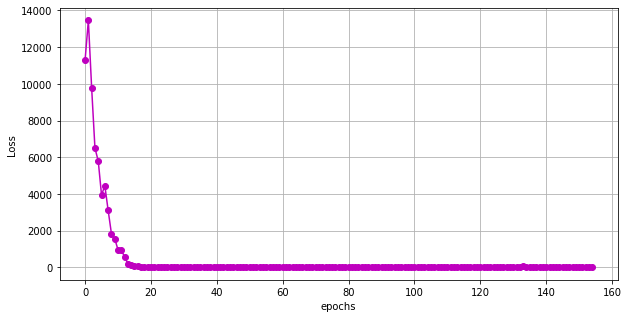

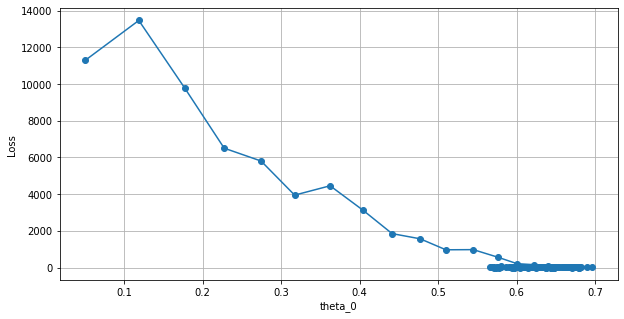

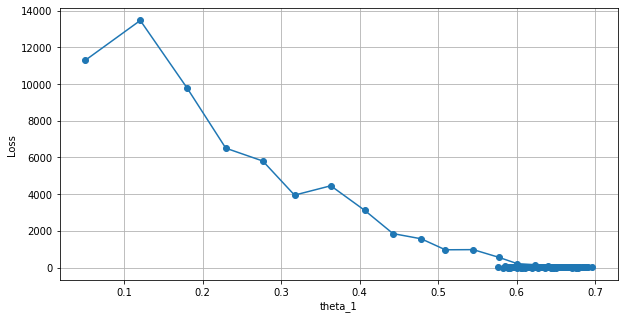

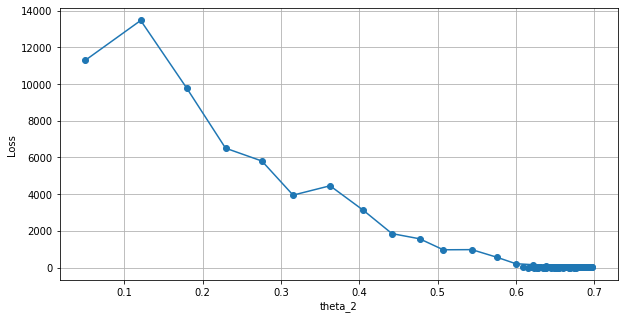

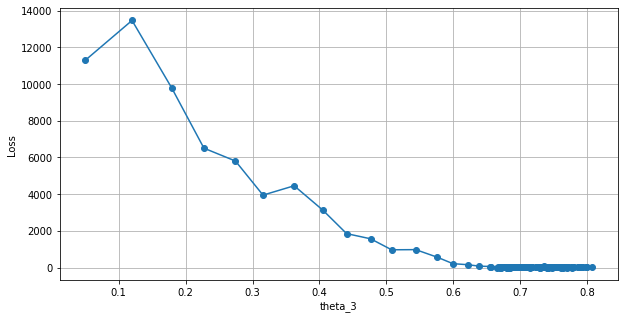

In [19]:
plot_loss(cost, "mo-")
plot_theta_loss(all_th[0, 1:], 'theta_0', cost, "bo-")
plot_theta_loss(all_th[1, 1:], 'theta_1', cost, "bo-")
plot_theta_loss(all_th[2, 1:], 'theta_2', cost, "bo-")
plot_theta_loss(all_th[3, 1:], 'theta_3', cost, "bo-")